In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


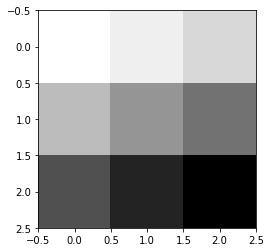

In [6]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


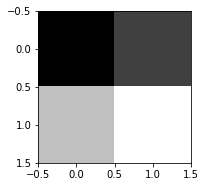

In [10]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape', conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

### padding  => SAME

weight2.shape (2, 2, 1, 1)
conv2d_img2.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


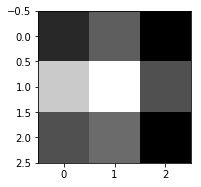

In [15]:
weight2 = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print('weight2.shape', weight2.shape)
conv2d2 = tf.nn.conv2d(image, weight2, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img2 = conv2d2.eval()
print('conv2d_img2.shape', conv2d_img2.shape)
conv2d_img2 = np.swapaxes(conv2d_img2, 0, 3)

for i, one_img in enumerate(conv2d_img2):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

### 3 filters

weight3.shape (2, 2, 1, 3)
conv2d_img3.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


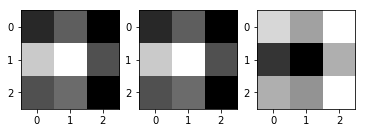

In [17]:
weight3 = tf.constant([[[[1., 10., -1.]],[[1., 10., -1.]]],
                       [[[1., 10., -1.]],[[1., 10., -1.]]]])
print('weight3.shape', weight3.shape)
conv2d3 = tf.nn.conv2d(image, weight3, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img3 = conv2d3.eval()
print('conv2d_img3.shape', conv2d_img3.shape)
conv2d_img3 = np.swapaxes(conv2d_img3, 0, 3)

for i, one_img in enumerate(conv2d_img3):
    print(one_img.reshape(3,3))
    plt.subplot(1, 3, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

# Max pooling

In [18]:
image2 = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image2, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


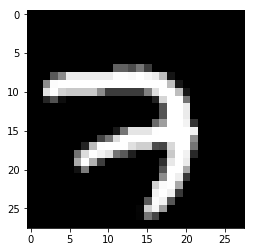

In [20]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_12:0", shape=(1, 14, 14, 5), dtype=float32)


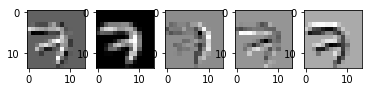

In [22]:
sess = tf.InteractiveSession()
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


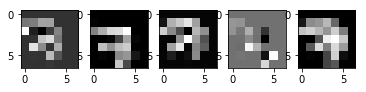

In [24]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)

for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')